In [2]:
import pandas as pd
import bqplot
import json
import pandas as pd 
import bqplot.pyplot as plt
import re
import numpy as np
import random
from functools import reduce
import seaborn as sns
from ast import literal_eval
# import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

***
Characteristics of this dataset: This dataset includes comprehensive water quality metrics from various locations. The data are from different locations and that makes it an essential information for environmental monitoring and research. The data encompasses several key parameters that are critical for assessing water health, such as pH levels, turbidity, contaminant levels, and biological oxygen demand. Also, the dataset is in csv which makes it easier for the person to use it overall. The purpose of the dataset is to analyze water quality and it provides various timeline record to analyze different trends in water quality over different locations. 
There are numerical and categorical data in this dataset. pH and turbidity are numeric and on the other side water body names are categorical. This dataset is a public domain resource hence I can use this dataset for both academic and commercial purposes without any licensing restrictions.
By analyzing and visualizing this data set, I can conduct detailed water quality analyses. 
***

## Dataset Info
***
Name of dataset : Water Quality Data
Dataset link : Water Quality Data on Data.gov (https://catalog.data.gov/dataset/water-quality-data-41c5e )
Download link : https://catalog.data.gov/dataset/water-quality-data-41c5e 
License:  The data is a U.S. Government Work and is in the public domain
Size: BKB_WaterQualityData_2020084.csv is 177KB and this dataset contains 2371 rows.
***

In [3]:
df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.000000,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.600000,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.600000,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.700000,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.000000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Bay,NaN,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,09:30,Sue Poe,11/13/2019,Christine Folks,25.555556,2018
2367,Bay,NaN,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,09:30,Sue Poe,11/13/2019,Christine Folks,14.444444,2018
2368,Bay,NaN,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,09:20,Sue Poe,11/13/2019,Christine Folks,9.444444,2018
2369,Bay,NaN,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,09:45,Sue Poe,11/13/2019,Christine Folks,18.333333,2018


Let's check if there is a missing value within the data!

In [4]:
df.isna().sum()


Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64

There might be lots of missing value in this dataset so I would like to clean up the dataset a little!


In [7]:
original_size = df.shape[0]
df.replace(["Unknown"], pd.NA, inplace=True)
df = df.dropna().reset_index(drop=True)
new_size = df.shape[0]

print(f"Original size: {original_size} rows")
print(f"New size after removal of 'Unknown' and NaN: {new_size} rows")
print(f"Number of rows removed: {original_size - new_size}")


Original size: 4 rows
New size after removal of 'Unknown' and NaN: 4 rows
Number of rows removed: 0


In [13]:

print("Count of 'Unknown' before replacement:", (df == 'Unknown').sum().sum())
df.replace(["Unknown"], pd.NA, inplace=True)
print("Count of 'Unknown' after replacement:", (df == 'Unknown').sum().sum())

print("Count of NaNs after replacement:", df.isna().sum().sum())


Count of 'Unknown' before replacement: 0
Count of 'Unknown' after replacement: 0
Count of NaNs after replacement: 0


In [12]:

print(df.isna().sum())


Site_Id                    0
Unit_Id                    0
Read_Date                  0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
Air Temp-Celsius           0
Air Temp (?F)              0
Time (24:00)               0
Field_Tech                 0
DateVerified               0
WhoVerified                0
AirTemp (C)                0
Year                       0
dtype: int64


In [16]:

test_row = {col: pd.NA for col in df.columns}
df = df.append(test_row, ignore_index=True)
print("Size before dropna():", df.shape[0])

df = df.dropna().reset_index(drop=True)
print("Size after dropna():", df.shape[0])


Size before dropna(): 5
Size after dropna(): 4


C:\Users\Angel\AppData\Local\Temp\ipykernel_6624\1453178989.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(test_row, ignore_index=True)


This test shows that the data set had no "Unknown" values and no NaN values affecting rows. The dropna() method is working as expected and I tried to remove any rows that contain NaN values.

## 1. Histogram of Water Temperature Variations


So now I want to explore the distribution of water temperatures to identify any prevalent patterns or unusual spikes which might suggest seasonal effects or anomalous data points.

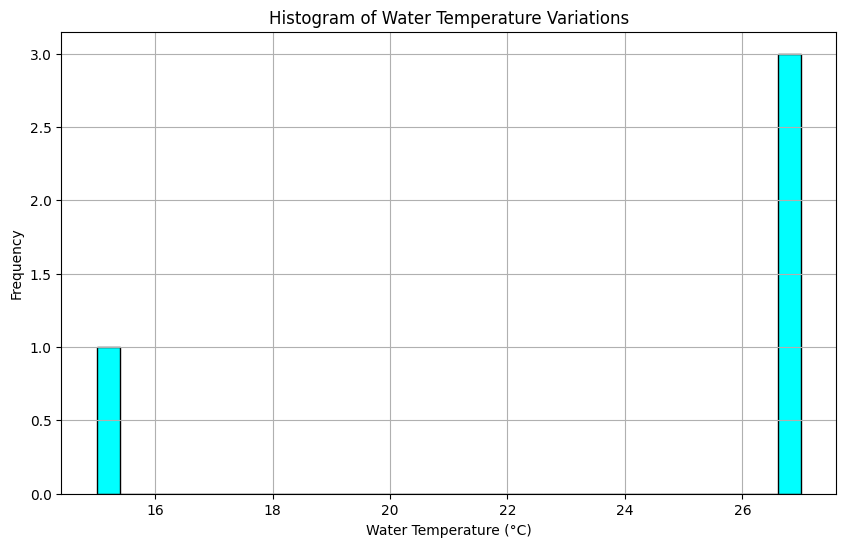

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Water Temp (?C)'], bins=30, color='cyan', edgecolor='black')
plt.title('Histogram of Water Temperature Variations')
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This histogram helps me visualize the distribution of water temperatures. By examining the spread and peaks, I can identify typical temperature ranges and spot any outliers. This analysis is crucial for understanding thermal conditions that might affect aquatic life. But I would like to adjust the bin width so it can provide a more detailed view of the data distribution.


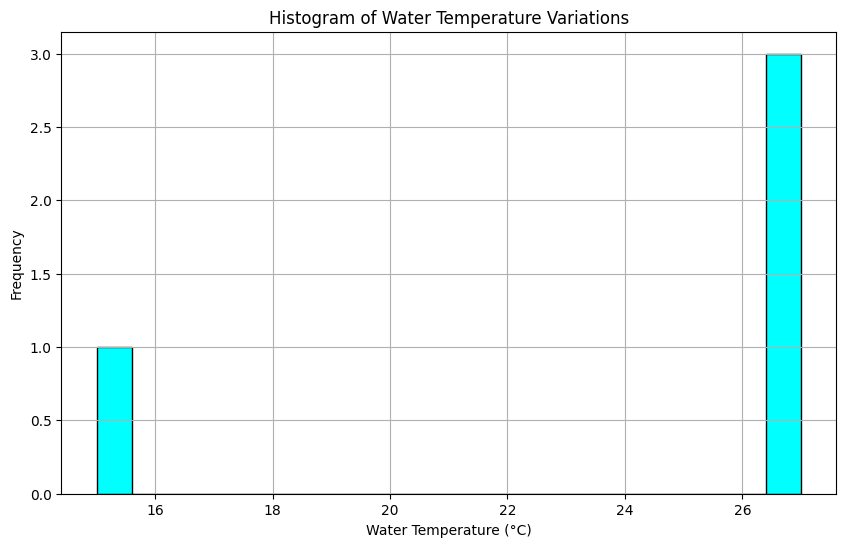

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Water Temp (?C)'], bins=20, color='cyan', edgecolor='black')  # Adjust the number of bins to 20 for finer granularity
plt.title('Histogram of Water Temperature Variations')
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2.Scatter Plot of Salinity vs. Dissolved Oxygen with Regression Line

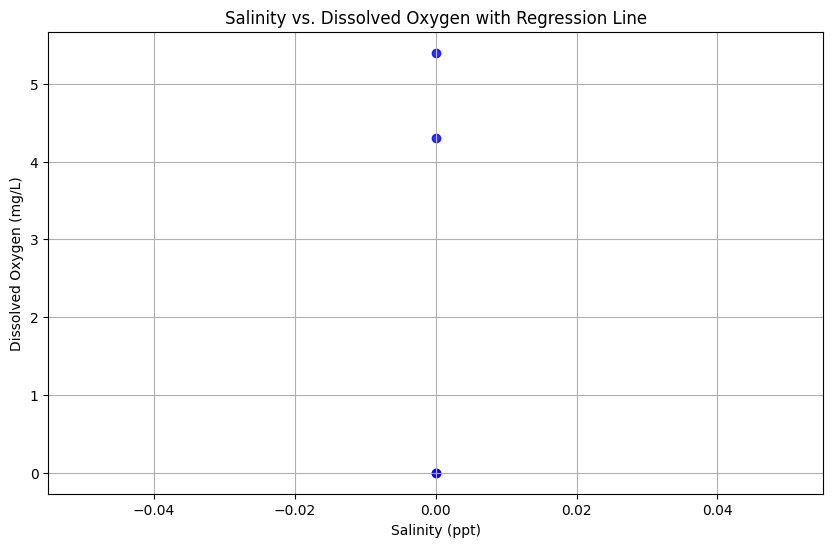

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Salinity vs. Dissolved Oxygen with Regression Line')
plt.xlabel('Salinity (ppt)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.grid(True)
plt.show()


I made this scatterplot to explore the relationship between the salinity of water and the levels of dissolved oxygen. They are an essential factor affecting aquatic life. The regression line added to the scatter plot provides a statistical summary of the potential relationship between these two variables and this means whether higher salinity correlates with lower levels of dissolved oxygen.
Some things/observations I found are: 

- This plot shows a small number of data point and this could limit the reliability of the regression analysis. 
- The data points do not show a clear pattern which means that the relationship between salinity and dissolved oxygen might be influenced by other environmental or measurement factors not captured solely by salinity levels.



## 3. Boxplot of Dissolved Oxygen by Year

Now I wanted to see and observe changes in dissolved oxygen levels over the years and understand their variability and trends 

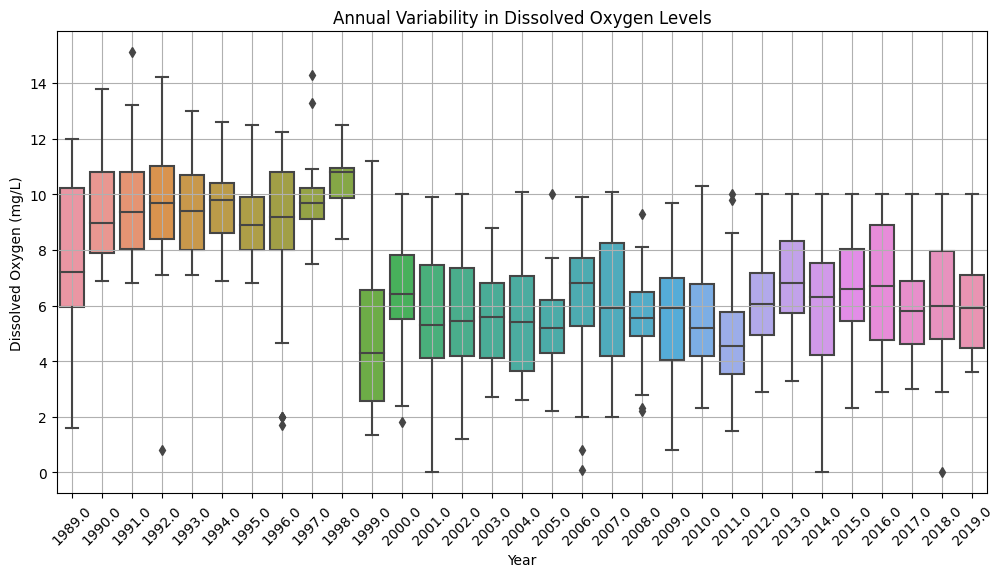

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df['Year'] = pd.to_datetime(df['Read_Date']).dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Dissolved Oxygen (mg/L)', data=df)
plt.title('Annual Variability in Dissolved Oxygen Levels')
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


This is pretty impressive how the boxplot captures the yearly distribution of dissolved oxygen levels in this much level. This  provides mr insights into their variability over time. I'm really interested in identifying any years with unusual patterns that might indicate ecological stress. 

Observing the changes in oxygen levels over the years helps me a lot to connect broader environmental policy shifts or climatic events with local water quality


## 4. Time Series of Water Depth Changes

I thought that analyzing the changes in water depth could give me insights into seasonal water level fluctuations or long-term trends due to climatic changes.

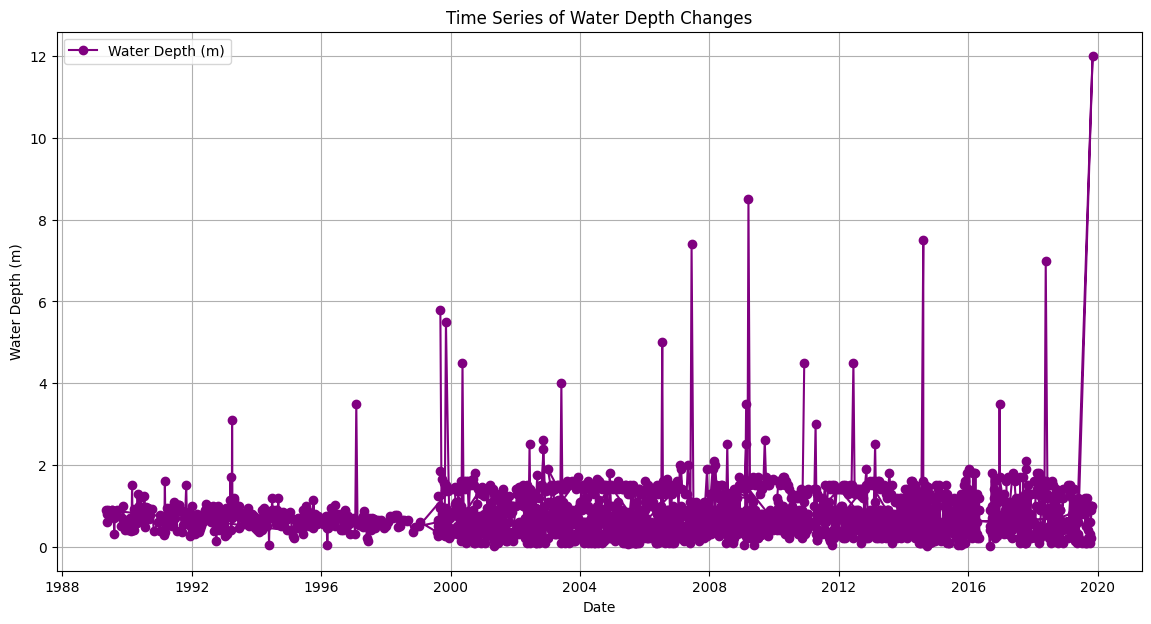

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df['Read_Date'] = pd.to_datetime(df['Read_Date'])

plt.figure(figsize=(14, 7))
plt.plot(df['Read_Date'], df['Water Depth (m)'], label='Water Depth (m)', marker='o', linestyle='-', color='purple')
plt.title('Time Series of Water Depth Changes')
plt.xlabel('Date')
plt.ylabel('Water Depth (m)')
plt.legend()
plt.grid(True)
plt.show()


This seems a lot chaotic so I am going to try rolling average so it can smooth out short-term fluctuations and help visualize longer-term trends more clearly. 

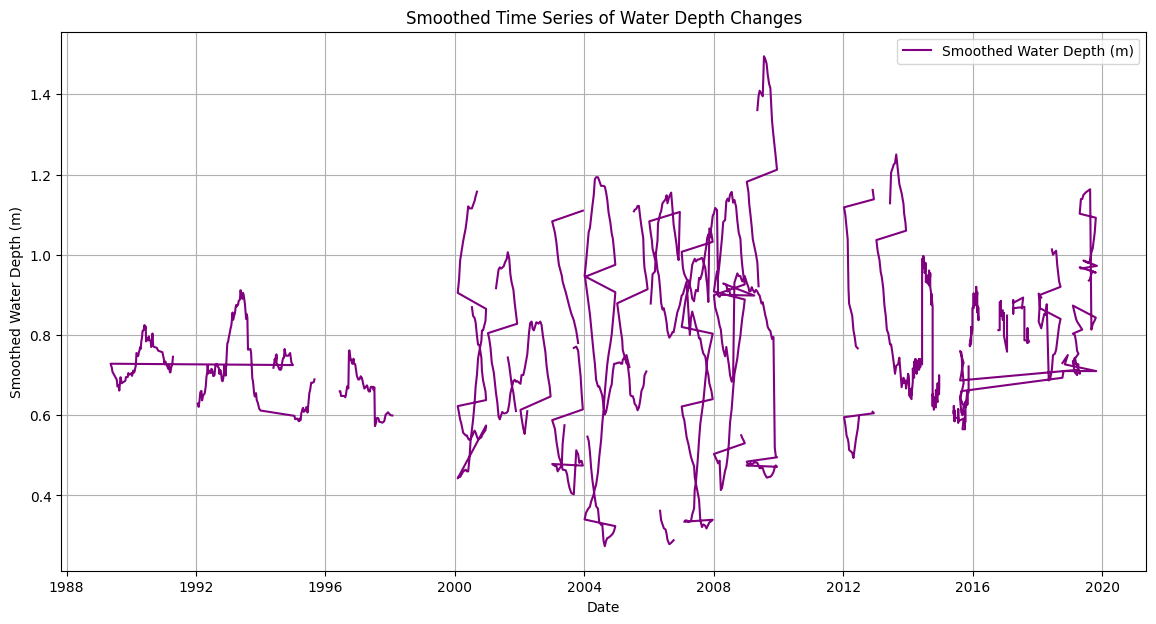

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df['Read_Date'] = pd.to_datetime(df['Read_Date'])
df.set_index('Read_Date', inplace=True)

df['Smoothed Water Depth'] = df['Water Depth (m)'].rolling(window=30, center=True).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Smoothed Water Depth'], color='purple', label='Smoothed Water Depth (m)')
plt.title('Smoothed Time Series of Water Depth Changes')
plt.xlabel('Date')
plt.ylabel('Smoothed Water Depth (m)')
plt.legend()
plt.grid(True)
plt.show()


I wanted to track the water depth measurements across the dataset's timeframe. I'm using this analysis to gauge potential impacts of seasonal cycles. I think tracking water depth changes has become an essential part of an environmental monitoring routine so these insights are valuable in discussions about water management and conservation strategies.
